In [1]:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number crunching

# For plotting and visualization
from IPython.display import display
import matplotlib.pyplot as plt

In [2]:
# We import our access keys from Twitter Dev Account
from credentials import *    # This will allow us to use the keys as variables

# API's setup
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys
    auth = tweepy.OAuthHandler('ZYR0Kx9hsD9CplJUfen1EbnE5', '0nUPvVlshHciJs0v0oJdxzrpNhDspyvQYIM1m9GSLfmIu7gMvp')
    auth.set_access_token('1067964677349552137-pnWUjHGHypElObj1tklUrMS1LOUwaR', 'GFdVIF15uaKjk7X1a83wNkoPNrfFWZCuBp2XnGZ9kwnUO')

    # Return API with authentication
    api = tweepy.API(auth)
    return api

In [3]:
# We create a tweet extractor object
extractor = twitter_setup()

# We create a tweet list as follows
tweets = extractor.user_timeline(screen_name="realDonaldTrump", count=200)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 200.

5 recent tweets:

Hopefully OPEC will be keeping oil flows as is, not restricted. The World does not want to see, or need, higher oil prices!

Looking forward to being with the Bush family. This is not a funeral, this is a day of celebration for a great man… https://t.co/UXuWeI1wX1

.....considered to be the worst and most dangerous, addictive and deadly substance of them all. Last year over 77,0… https://t.co/WBWXo8q5VB

One of the very exciting things to come out of my meeting with President Xi of China is his promise to me to crimin… https://t.co/pouGyRq2B3

Very strong signals being sent by China once they returned home from their long trip, including stops, from Argenti… https://t.co/mjFIsG8tmV



In [4]:
# We create a pandas dataframe as follows
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe
data.head(10)

,Tweets
0,Hopefully OPEC will be keeping oil flows as is...
1,Looking forward to being with the Bush family....
2,.....considered to be the worst and most dange...
3,One of the very exciting things to come out of...
4,Very strong signals being sent by China once t...
5,.....China had agreed to start “immediately” b...
6,“China officially echoed President Donald Trum...
7,.....China does not want Tariffs!
8,We are either going to have a REAL DEAL with C...
9,....in the world. I want clean air and clean w...


In [5]:
# Lets see all the features of a single tweet object
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [6]:
# We print info from the first tweet
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1070328136150200320
2018-12-05 14:44:48
Twitter for iPhone
55774
12050
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}


In [7]:
# We add relevant data to pandas dataframe
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [8]:
# Display of first 10 elements from dataframe
data.head(10)

,Tweets,len,ID,Date,Source,Likes,RTs
0,Hopefully OPEC will be keeping oil flows as is...,123,1070328136150200320,2018-12-05 14:44:48,Twitter for iPhone,55774,12050
1,Looking forward to being with the Bush family....,139,1070315986287583232,2018-12-05 13:56:31,Twitter for iPhone,88150,14042
2,.....considered to be the worst and most dange...,140,1070314629732163586,2018-12-05 13:51:07,Twitter for iPhone,57211,13205
3,One of the very exciting things to come out of...,140,1070312880095068160,2018-12-05 13:44:10,Twitter for iPhone,47103,10887
4,Very strong signals being sent by China once t...,140,1070306739092889601,2018-12-05 13:19:46,Twitter for iPhone,63850,13383
5,.....China had agreed to start “immediately” b...,77,1070299196538961920,2018-12-05 12:49:48,Twitter for iPhone,45990,10392
6,“China officially echoed President Donald Trum...,140,1070298360572198913,2018-12-05 12:46:28,Twitter for iPhone,48570,11709
7,.....China does not want Tariffs!,33,1070110927788347393,2018-12-05 00:21:41,Twitter for iPhone,63058,12390
8,We are either going to have a REAL DEAL with C...,140,1070110615627333632,2018-12-05 00:20:27,Twitter for iPhone,74806,16829
9,....in the world. I want clean air and clean w...,140,1070089367224549377,2018-12-04 22:56:01,Twitter for iPhone,87268,21488


In [9]:
# Check full list 
data

,Tweets,len,ID,Date,Source,Likes,RTs
0,Hopefully OPEC will be keeping oil flows as is...,123,1070328136150200320,2018-12-05 14:44:48,Twitter for iPhone,55774,12050
1,Looking forward to being with the Bush family....,139,1070315986287583232,2018-12-05 13:56:31,Twitter for iPhone,88150,14042
2,.....considered to be the worst and most dange...,140,1070314629732163586,2018-12-05 13:51:07,Twitter for iPhone,57211,13205
3,One of the very exciting things to come out of...,140,1070312880095068160,2018-12-05 13:44:10,Twitter for iPhone,47103,10887
4,Very strong signals being sent by China once t...,140,1070306739092889601,2018-12-05 13:19:46,Twitter for iPhone,63850,13383
5,.....China had agreed to start “immediately” b...,77,1070299196538961920,2018-12-05 12:49:48,Twitter for iPhone,45990,10392
6,“China officially echoed President Donald Trum...,140,1070298360572198913,2018-12-05 12:46:28,Twitter for iPhone,48570,11709
7,.....China does not want Tariffs!,33,1070110927788347393,2018-12-05 00:21:41,Twitter for iPhone,63058,12390
8,We are either going to have a REAL DEAL with C...,140,1070110615627333632,2018-12-05 00:20:27,Twitter for iPhone,74806,16829
9,....in the world. I want clean air and clean w...,140,1070089367224549377,2018-12-04 22:56:01,Twitter for iPhone,87268,21488


In [10]:
# Tweet Cleaner & Sentiment Analyzer setup

from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [11]:
# We create and add a column with the result of the analysis to pandas dataframe
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# Show updated dataframe with the new column
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,Hopefully OPEC will be keeping oil flows as is...,123,1070328136150200320,2018-12-05 14:44:48,Twitter for iPhone,55774,12050,1
1,Looking forward to being with the Bush family....,139,1070315986287583232,2018-12-05 13:56:31,Twitter for iPhone,88150,14042,1
2,.....considered to be the worst and most dange...,140,1070314629732163586,2018-12-05 13:51:07,Twitter for iPhone,57211,13205,-1
3,One of the very exciting things to come out of...,140,1070312880095068160,2018-12-05 13:44:10,Twitter for iPhone,47103,10887,1
4,Very strong signals being sent by China once t...,140,1070306739092889601,2018-12-05 13:19:46,Twitter for iPhone,63850,13383,1
5,.....China had agreed to start “immediately” b...,77,1070299196538961920,2018-12-05 12:49:48,Twitter for iPhone,45990,10392,0
6,“China officially echoed President Donald Trum...,140,1070298360572198913,2018-12-05 12:46:28,Twitter for iPhone,48570,11709,0
7,.....China does not want Tariffs!,33,1070110927788347393,2018-12-05 00:21:41,Twitter for iPhone,63058,12390,0
8,We are either going to have a REAL DEAL with C...,140,1070110615627333632,2018-12-05 00:20:27,Twitter for iPhone,74806,16829,1
9,....in the world. I want clean air and clean w...,140,1070089367224549377,2018-12-04 22:56:01,Twitter for iPhone,87268,21488,1


In [12]:
# We construct lists with classified tweets from sentiment analyzer

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [13]:
# We print percentages of types of tweets

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 54.5%
Percentage of neutral tweets: 28.0%
Percentage de negative tweets: 17.5%


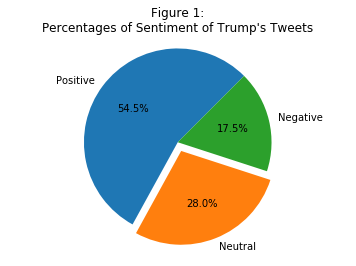

In [14]:
# Pie chart of percentages of tweets
pos = len(pos_tweets)*100/len(data['Tweets'])
neg = len(neu_tweets)*100/len(data['Tweets'])
neu = len(neg_tweets)*100/len(data['Tweets'])


labels = 'Positive', 'Neutral', 'Negative'
sizes = [pos, neg, neu]
explode = (0, 0.1, 0)  


fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=45)
ax1.axis('equal') 

ax1.set_title("Figure 1:\n" + "Percentages of Sentiment of Trump's Tweets")

plt.show()

In [15]:
# Figure out all possible sources of tweets
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# Print sources list
print("Creation of content sources:")
for source in sources:
    print("- {}".format(source))


Creation of content sources:
- Twitter for iPhone
- Twitter Media Studio


In [16]:
# Create list of classified source of tweets (iPhone vs Media Studio)
iPhone_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['Source'][index] == 'Twitter for iPhone']
non_mobile_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['Source'][index] == 'Twitter Media Studio']

print('Number of tweets written from mobile device: ' + str(len(iPhone_tweets)))
print('Number of tweets not written from a mobile device: ' +str(len(non_mobile_tweets)))

Number of tweets written from mobile device: 198
Number of tweets not written from a mobile device: 2


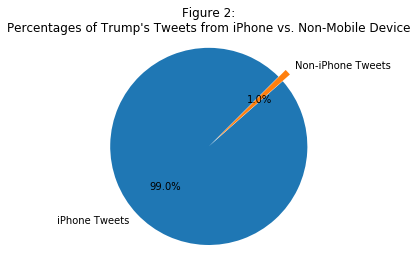

In [17]:
# Plot percentage of tweets from iPhone vs. Non-mobile device

Mobile = len(iPhone_tweets)*100/len(data['Source'])
Not_Mobile = len(non_mobile_tweets)*100/len(data['Source'])

labels = 'iPhone Tweets', 'Non-iPhone Tweets'
sizes = [Mobile, Not_Mobile]
explode = (0, 0.1)  


fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=45)
ax1.axis('equal') 

ax1.set_title("Figure 2:\n" + "Percentages of Trump's Tweets from iPhone vs. Non-Mobile Device")

plt.show()

In [18]:
# Create Weekday Column (Weekday_alpha) to categorize day of the week tweets are posted
import datetime

# Modify data to reflect day of week
dataWeekday = data
Weekday = data['Date'].dt.weekday
dataWeekday['Weekday'] = Weekday


# Assign alpha names to each date integer
WeekdayAlpha=[]
for i in Weekday:    
    if i == 0:
        WeekdayAlpha.append('2 Monday')
    elif i == 1:
        WeekdayAlpha.append('3 Tuesday')
    elif i == 2:
        WeekdayAlpha.append('4 Wednesday')
    elif i == 3:
        WeekdayAlpha.append('5 Thursday')
    elif i == 4:
        WeekdayAlpha.append('6 Friday')
    elif i == 5:
        WeekdayAlpha.append('7 Saturday')
    else:
        WeekdayAlpha.append('1 Sunday')

In [19]:
# Add alpha name to the data frame & verify 
dataWeekday['Weekday_Alpha']= WeekdayAlpha
dataWeekday.head()

,Tweets,len,ID,Date,Source,Likes,RTs,SA,Weekday,Weekday_Alpha
0,Hopefully OPEC will be keeping oil flows as is...,123,1070328136150200320,2018-12-05 14:44:48,Twitter for iPhone,55774,12050,1,2,4 Wednesday
1,Looking forward to being with the Bush family....,139,1070315986287583232,2018-12-05 13:56:31,Twitter for iPhone,88150,14042,1,2,4 Wednesday
2,.....considered to be the worst and most dange...,140,1070314629732163586,2018-12-05 13:51:07,Twitter for iPhone,57211,13205,-1,2,4 Wednesday
3,One of the very exciting things to come out of...,140,1070312880095068160,2018-12-05 13:44:10,Twitter for iPhone,47103,10887,1,2,4 Wednesday
4,Very strong signals being sent by China once t...,140,1070306739092889601,2018-12-05 13:19:46,Twitter for iPhone,63850,13383,1,2,4 Wednesday


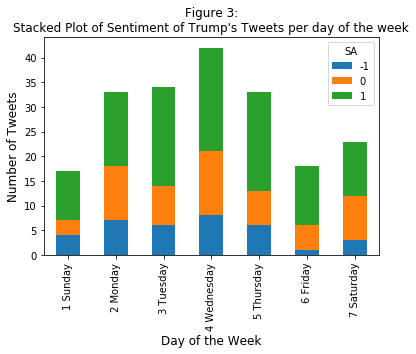

In [20]:
# Plot sentiment of Trump tweets per day of the week

stacked = dataWeekday.groupby(['Weekday_Alpha','SA'])['Weekday_Alpha'].count().unstack('SA')

stacked.plot(kind = 'bar', stacked = True, title = 'Figure 3:\n'+ "Stacked Plot of Sentiment of Trump's Tweets per day of the week")

plt.ylabel('Number of Tweets',fontsize=12)

plt.xlabel('Day of the Week',fontsize=12)

plt.show()

In [21]:
# CreateCreate hour column with conditonal formatting

# Modify data to reflect hour of day
datatimeoftweet = data
timeofday = data['Date'].dt.time

# Assign hour category to time of each tweet
hour=[]
for i in timeofday:
    time = i
    if time.hour == 1:
        hour.append('01:00')
    elif time.hour == 2:
        hour.append('02:00')
    elif time.hour == 3:
        hour.append('03:00')
    elif time.hour == 4:
        hour.append('04:00')
    elif time.hour == 5:
        hour.append('05:00')
    elif time.hour == 6:
        hour.append('06:00')
    elif time.hour == 7:
        hour.append('07:00')
    elif time.hour == 8:
        hour.append('08:00')
    elif time.hour == 9:
        hour.append('09:00')
    elif time.hour == 10:
        hour.append('10:00')
    elif time.hour == 11:
        hour.append('11:00')
    elif time.hour == 12:
        hour.append('12:00')
    elif time.hour == 13:
        hour.append('13:00')
    elif time.hour == 14:
        hour.append('14:00')
    elif time.hour == 15:
        hour.append('15:00')
    elif time.hour == 16:
        hour.append('16:00')
    elif time.hour == 17:
        hour.append('17:00')
    elif time.hour == 18:
        hour.append('18:00')
    elif time.hour == 19:
        hour.append('19:00')
    elif time.hour == 20:
        hour.append('20:00')
    elif time.hour == 21:
        hour.append('21:00')
    elif time.hour == 21:
        hour.append('22:00')
    elif time.hour == 23:
        hour.append('23:00')
    else:
        hour.append('00:00')

In [22]:
# Add hour category to the data frame & check data frame 
datatimeoftweet['Hour']= hour
datatimeoftweet.head()

,Tweets,len,ID,Date,Source,Likes,RTs,SA,Weekday,Weekday_Alpha,Hour
0,Hopefully OPEC will be keeping oil flows as is...,123,1070328136150200320,2018-12-05 14:44:48,Twitter for iPhone,55774,12050,1,2,4 Wednesday,14:00
1,Looking forward to being with the Bush family....,139,1070315986287583232,2018-12-05 13:56:31,Twitter for iPhone,88150,14042,1,2,4 Wednesday,13:00
2,.....considered to be the worst and most dange...,140,1070314629732163586,2018-12-05 13:51:07,Twitter for iPhone,57211,13205,-1,2,4 Wednesday,13:00
3,One of the very exciting things to come out of...,140,1070312880095068160,2018-12-05 13:44:10,Twitter for iPhone,47103,10887,1,2,4 Wednesday,13:00
4,Very strong signals being sent by China once t...,140,1070306739092889601,2018-12-05 13:19:46,Twitter for iPhone,63850,13383,1,2,4 Wednesday,13:00


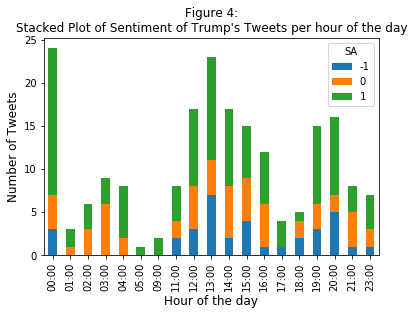

In [23]:
# Create plot of sentiment of Trump tweets per hour of the day and add labels

stacked = datatimeoftweet.groupby(['Hour','SA'])['Hour'].count().unstack('SA')

stacked.plot(kind = 'bar', stacked = True, title = 'Figure 4:\n'+ "Stacked Plot of Sentiment of Trump's Tweets per hour of the day")

plt.ylabel('Number of Tweets',fontsize=12)

plt.xlabel('Hour of the day',fontsize=12)

plt.show()